In [55]:
# Initialize Otter
import otter
grader = otter.Notebook("lab10.ipynb")

<img src="data8logo.png" alt="Data 8 Logo" style="width: 15%; float: right; padding: 1%; margin-right: 2%;"/>

# Lab 10: Conditional Probability

Welcome to Lab 10! (the last lab of the semester!)

Lab 10 focuses on one of the final topics in the course, conditional probability. 

#### **Helpful Resource:**
- [Python Reference](http://data8.org/sp25/reference/)

**Recommended Readings:**

* [Chapter 18](https://inferentialthinking.com/chapters/18/Updating_Predictions.html)

In [56]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore')

# This line loads the visualization code for this lab.
import visualizations

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# 1. What is conditional probability good for?

Suppose we have a known population, like all dogs in California.  So far, we've seen two ways of *predicting* something about an individual in that population, given incomplete knowledge about the identity of the individual:

* If we know nothing about the individual dog, we could predict that its speed is the *average* or *median* of all the speeds in the population.
* If we know the dog's height but not its speed, we could use *linear regression* to predict its speed from its height.  The resulting prediction is still imperfect, but it might be more accurate than the population average.

We can also compute conditional probabilities to make predictions about individuals or events. This technique is different from the previous methods we’ve examined because 

1. our prediction for each outcome is described by a probability, and 
2. each probability can be exactly calculated from assumptions, as opposed to estimated from data.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# 2. Icon arrays
Parts 3 and 4 of this lab work with a more complex example about disease, but first, let's start with a simple example.

Imagine you and Samantha are playing a game in which you are given a marble and tasked to determine the marble's texture and size. You don't know anything about the marble you're given, but you know that Samantha drew it **uniformly at random** from a bag that contained the following marbles:
* 4 large shiny marbles,
* 1 large dull marble,
* 6 small shiny marbles,
* 2 small dull marbles.

---

**Question 2.0.1.** Knowing only what we've told you so far, what's the probability that the marble you're given was a large shiny marble?


In [57]:
probability_large_shiny = 4/13

In [58]:
grader.check("q2_0_1")

q2_0_1 results: All test cases passed!

Here's a table with those marbles:

In [59]:
marbles = Table.read_table("marbles.csv")
marbles.show()

surface,size
shiny,large
shiny,large
shiny,large
shiny,large
dull,large
shiny,small
shiny,small
shiny,small
shiny,small
shiny,small


Here are the counts of each type of marble in a pivot table.

In [60]:
marbles.pivot('surface', 'size')

size,dull,shiny
large,1,4
small,2,6


Here are all the different combinations of surface and size, with the count for each surface-size combination. Each type of marble appears in its own row.

In [61]:
marbles.group(['surface', 'size'])

surface,size,count
dull,large,1
dull,small,2
shiny,large,4
shiny,small,6


We've included some code to display something called an *icon array*.  The functions in the cell below create icon arrays from various kinds of tables. Don't worry about understanding the code; just run this cell.

**NOTE:** You may ignore the the y-axis labels. Just remember that each box represents 1 marble. 

In [62]:
# Run this cell.

#######################################################################
# The functions you'll need to actually use are in here.  Each is a
# way of making an icon array from a differently-formatted table.
#######################################################################

def display_icon_array(table, groups, individuals_name):
    """
    Given a table and some columns to group it on, displays an icon array
    of the groups.
    
    groups should be an array of labels of columns in table.
    
    individuals_name is your name for the individual rows of table.
    For example, if we're talking about a population of people,
    individuals_name should be "people".
    
    For example:
    
    display_icon_array(marbles, ["surface", "size"], "marbles")
    """
    display_grouped_icon_array(table.group(groups), individuals_name)

def display_grouped_icon_array(grouped_data, individuals_name):
    """
    Given a table with counts for data grouped by 1 or more categories,
    displays an icon array of the groups represented in the table.
    
    grouped_data should be a table of frequencies or counts, such as
    a table created by calling the groups method on some table.
    
    individuals_name is your name for the individual members of the
    dataset.  For example, if we're talking about a population of
    people, individuals_name should be "people".
    
    For example:
    
    display_grouped_icon_array(marbles.group(["surface", "size"]), "marbles")
    """
    visualizations.display_combinations(grouped_data, individuals_name=individuals_name)

def display_crosstab_icon_array(crosstabulation, x_label, individuals_name):
    """
    Given a crosstabulation table, displays an icon array of the groups
    represented in the table.
    
    crosstabulation should be a table of frequencies or counts created by
    calling pivot on some table.
    
    x_label should be the label of the categories listed as columns (on
    the "x axis" when the crosstabulation table is printed).
    
    individuals_name is your name for the individual members of the
    dataset.  For example, if we're talking about a population of
    people, individuals_name should be "people".
    
    For example:
    
    display_crosstab_icon_array(marbles.pivot("surface", "size"), "surface", "marbles")
    """
    display_grouped_icon_array(visualizations.pivot_table_to_groups(crosstabulation, x_label), individuals_name)

Here's an icon array of all the marbles, grouped by surface and size:

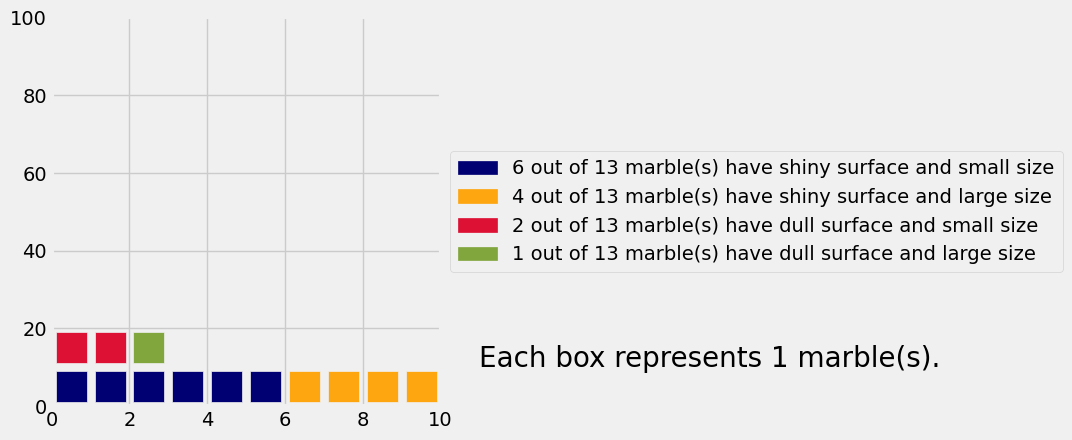

In [63]:
# Run this cell.
display_grouped_icon_array(marbles.group(["surface", "size"]), "marble(s)")

You should imagine that the marble you've been given was selected by a random draw from these 13 icons.

The following is an icon array of the marbles, grouped **only by their surface (shiny/dull)**.

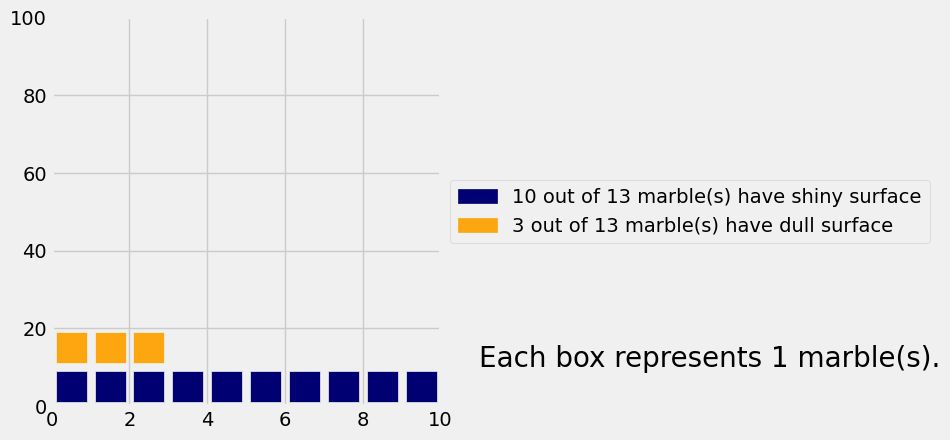

In [64]:
display_grouped_icon_array(marbles.group("surface"), "marble(s)")

Knowing nothing else about the marble, it's equally likely to be any of the marbles depicted above; this is because we've assumed that the marble is selected **uniformly at random** from the bag.

---

**Question 2.0.2.** What's the probability that you've been given a shiny marble? Answer using mathematical expressions by looking at your icon array.


In [65]:
probability_shiny = 10/13

In [66]:
grader.check("q2_0_2")

q2_0_2 results: All test cases passed!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 2.1. Conditional probability

Suppose you overhear Samantha say that you were given a large marble. Does this somehow change the chance that your marble is shiny?  Let's find out.

Go back to the full icon array, displayed below for convenience.

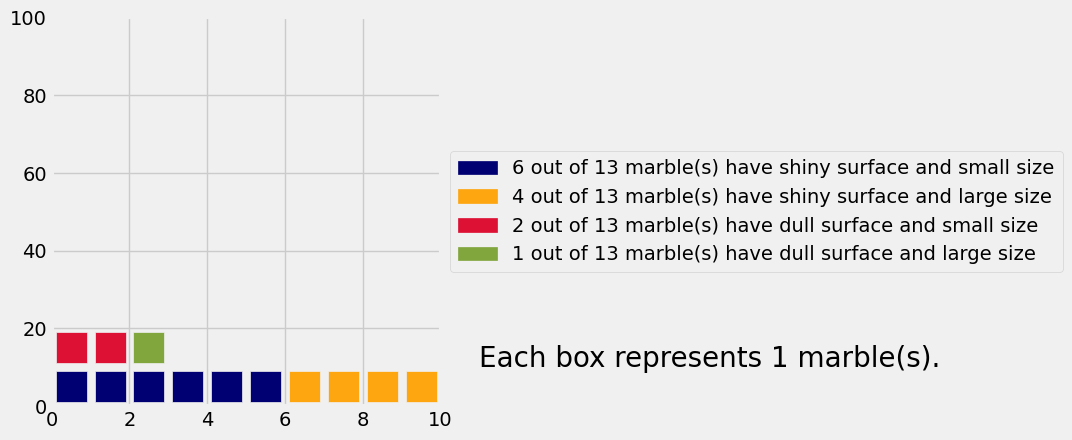

In [67]:
display_grouped_icon_array(marbles.group(["surface", "size"]), "marble(s)")

In question 2.0.2, we assumed that the marble you were given was equally likely to be any of the marbles, simply because we didn't know any better.  That's why we looked at all the marbles to compute the probability that your marble was shiny.

But assuming that you've been given a large marble, we can eliminate some of these possibilities. In particular, you can't have been given a small shiny marble or a small dull marble.

You're still equally likely to have been given any of the remaining marbles, because you don't know any other information.  So here's an icon array of those remaining possibilities:

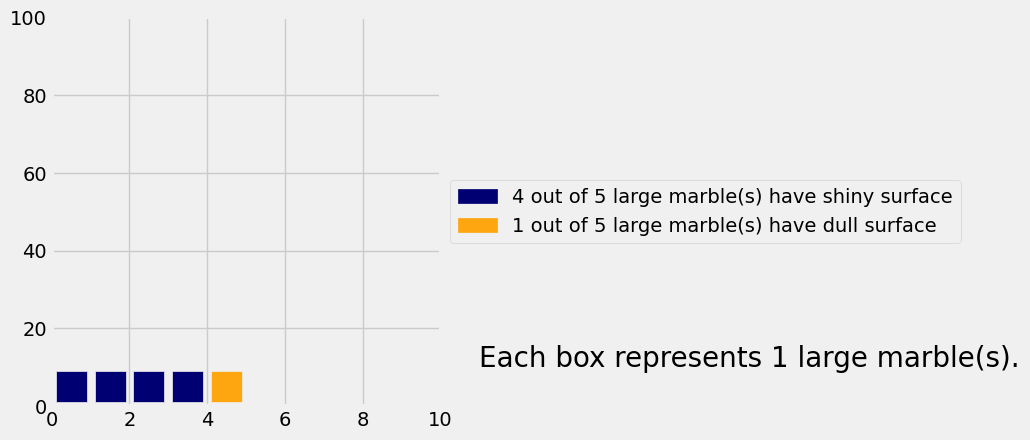

In [68]:
# Just run this cell.
display_grouped_icon_array(marbles.where("size", "large").group("surface"), "large marble(s)")

---

**Question 2.1.1.** What's the probability Samantha gave you a shiny marble, knowing that she gave you a large marble? 

*Hint: Take a look at the icon array.*


In [69]:
probability_shiny_given_large = 4/5

In [70]:
grader.check("q2_1_1")

q2_1_1 results: All test cases passed!

You should have found that this is different from the probability that Samantha gave you a shiny marble, given no size information, which you computed earlier.  The distribution of surfaces among the large marbles is a little different from the distribution of surfaces among all the marbles. We have calculated a conditional probability with the additional assumption of a given size

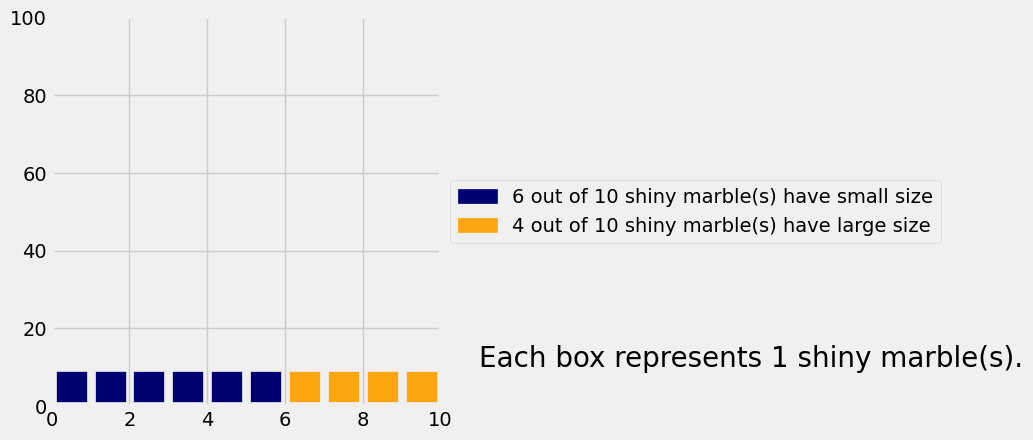

In [71]:
# Run this cell to display the icon array. Then fill answer the next question.
display_grouped_icon_array(marbles.where("surface", "shiny").group("size"), "shiny marble(s)")

---

**Question 2.1.2.** Suppose instead Samantha had said she gave you a **shiny** marble (hooray!). What's the probability that the marble given to you is large? 

Run the code cell above to display the icon array, then assign `probability_large_given_shiny` to the appropriate value.

In [72]:
probability_large_given_shiny = 4/10

In [73]:
grader.check("q2_1_2")

q2_1_2 results: All test cases passed!

---

**Question 2.1.3.** Can you answer the previous two questions just by looking at the full icon array?  (You can run the cell below to see it again.)

*Hint:* Check out [Ch 18.2](https://inferentialthinking.com/chapters/18/2/Making_Decisions.html) for a refresher on how to use Bayes' Rule.

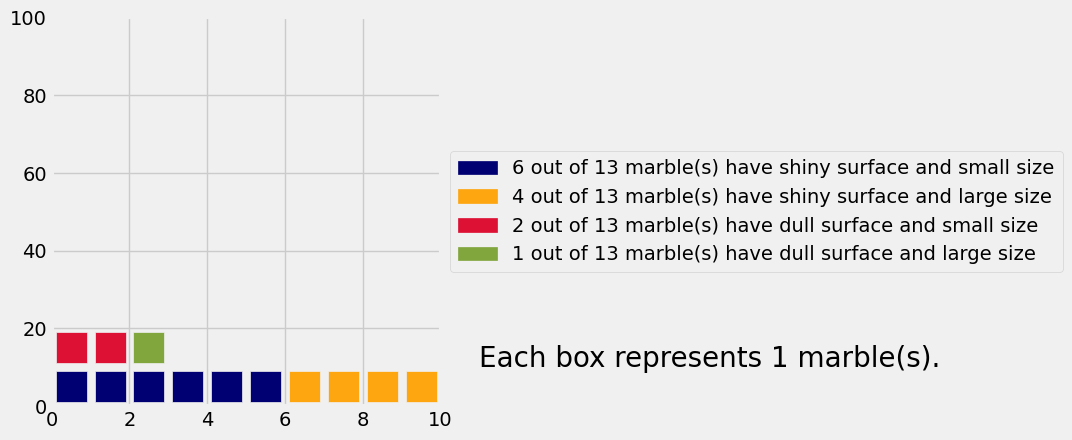

In [74]:
# Just run this cell.  The next cell is where you should write your answer.
display_grouped_icon_array(marbles.group(["surface", "size"]), "marble(s)")

If you can, how? If not, why not? Check with your lab peers or a staff member to see if you are on the right track. 


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# 3. Cancer screening
Hopefully the icon arrays from the previous portion helped you build intuition for why conditional probabilities can be helpful. Now, let’s look at a real life application.

### Background
Medical testing is very important, especially for cancer. A basic cancer screening involves looking for cancer before a person has any symptoms. 

Cancer screening is not 100% reliable, and it can have errors. There are cases in which someone without cancer or with a benign tumor sees a positive test result. There are also cases where someone with cancer can receive a negative result. (“Positive” implies an indication of cancer in this context.) The first case, called a false positive, could cause anxiety for a patient and lead to further testing that may be risky and involve unnecessary radiation. In the second case, called a false negative, a person would not receive the necessary information and possible treatment for their condition.

Conditional probability can provide insight into the accuracy of initial cancer tests. For example, you can compute the chance that a person has cancer given the results of a diagnostic test by combining information from different probability distributions. You’ll see that the chance Person X does have cancer even if they receive a positive result is not necessarily 100%.

It is important to note that conditional probabilities offer just one line of insight to understanding a test result and that this statistical approach does not take into account important factors like heredity or environment that come to affect a person’s health and diagnoses. The [Centers for Disease Control and Prevention](https://www.cdc.gov/cancer/dcpc/prevention/screening.htm) (CDC) recommends getting preventative cancer screenings, and one should always consult a doctor if they are concerned about their health. 

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 3.1. Basic cancer statistics

Note: All of the following statistics are made up and don’t necessarily reflect the actual state of the world.


Suppose that in a representative group of 10,000 people who are tested for cancer ("representative" meaning that the frequencies of different events are the same as the frequencies in the whole population):
1. 100 people have cancer.
2. Among the 100 people that have cancer, 90 have positive results on a cancer test and 10 have negative results.  (So 10 people receive false negative results.)
3. The other 9,900 people don't have cancer.
4. Among these 9,900 people, 198 have positive results on a cancer test and the other 9,702 have negative results.  (So 198 see "false positive" results.)

Below we've generated a table with data from these 10,000 hypothetical people.

*Note: These statistics are made up and don’t necessarily reflect the actual state of the world.*

In [75]:
people = Table().with_columns(
    "status", ["cancer", "cancer", "no cancer", "no cancer"],
    "test status", ["positive", "negative", "positive", "negative"],
    "count", [90, 10, 198, 9702])
people

status,test status,count
cancer,positive,90
cancer,negative,10
no cancer,positive,198
no cancer,negative,9702


One way to visualize this dataset is with a contingency table, which you've seen before.

---

**Question 3.1.1.** Using the `people` table defined above, assign `cancer` to a contingency table that looks like this:

|status|negative|positive|
|-|-|-|
|cancer|||
|no cancer||||

with the **count** of each group filled in, according to what we've told you above.  The counts in the 4 boxes should sum to 10,000.


In [76]:
cancer = Table().with_column (
    "status", ["cancer", " no cancer"], 
    "negative", [10, 9702],
    "positive", [90, 10]
)
cancer

TypeError: Table.with_column() takes from 3 to 4 positional arguments but 7 were given

In [ ]:
grader.check("q3_1_1")

q3_1_1 results: All test cases passed!

Here is the `people` data in an icon array.

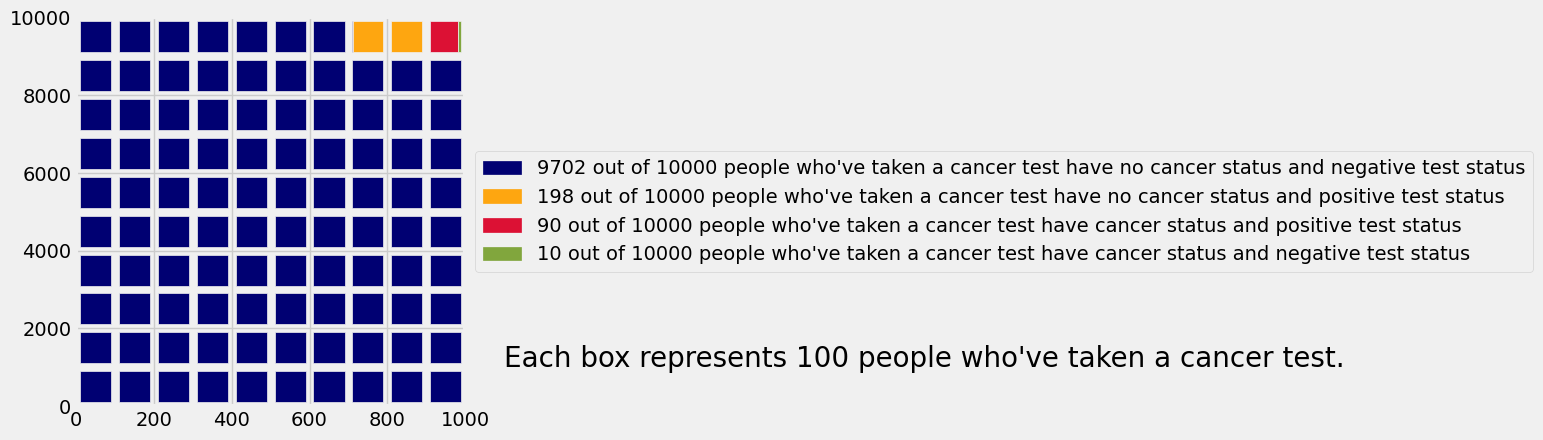

In [ ]:
display_grouped_icon_array(people, "people who've taken a cancer test")

Now let's think about how you can use this kind of information when Person X is tested for cancer.

Before you know any information about Person X, you could imagine Person X as a **uniform random sample** of one of the 10,000 people in this imaginary population of people who have been tested.

What's the chance that Person X has cancer, knowing nothing else about them? If we add together the green and red labeled categories from the visual above, we can find that the chance is $\frac{100}{10000}$, or 1%.  We can see that more directly with this icon array:

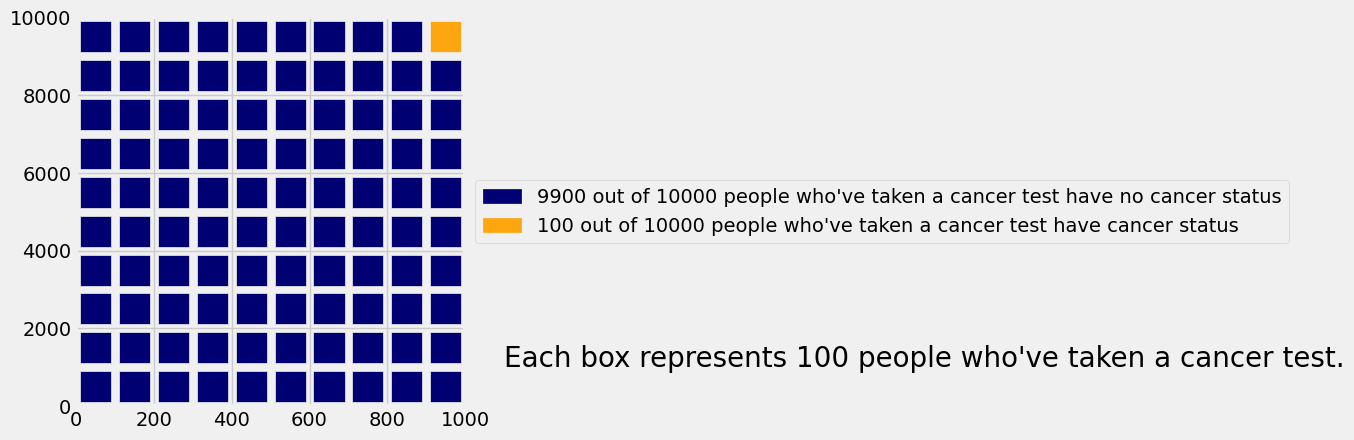

In [ ]:
by_health = people.select(0, 2).group(0, sum).relabeled(1, 'count')
display_grouped_icon_array(by_health, "people who've taken a cancer test")

---

**Question 3.1.2.** What's the chance that Person X has a positive test result, knowing nothing else about them?
Run the next code cell to display an icon array, then assign `probability_positive_test` to this value.

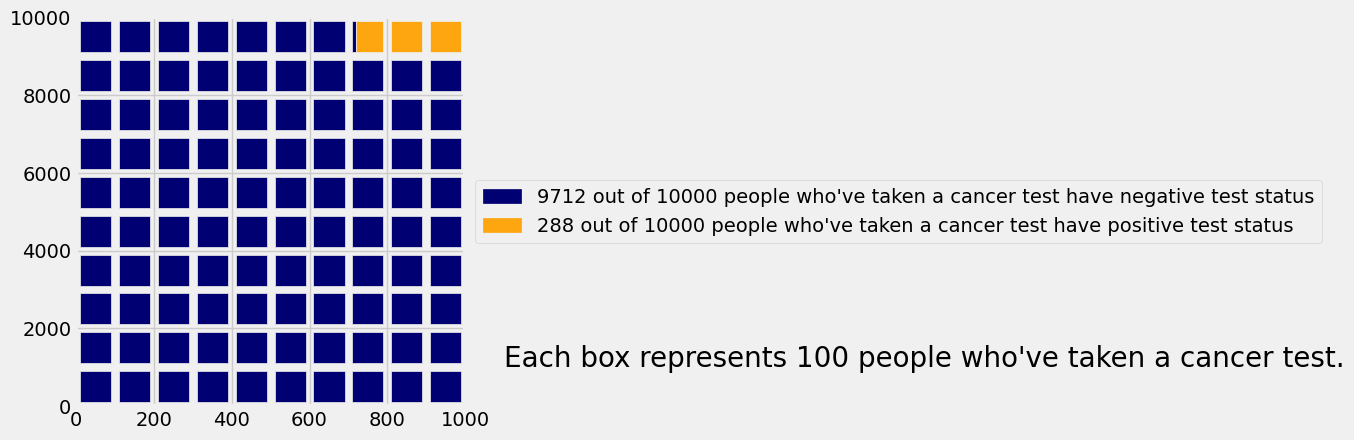

In [ ]:
# Run this cell first to display an icon array. Then fill in the probability of a positive test result in the next cell.
by_test = people.select(1, 2).group(0, sum).relabeled(1, 'count')
display_grouped_icon_array(by_test, "people who've taken a cancer test")

In [ ]:
# Now fill in the probability of a positive test result
probability_positive_test = 288 / 10000

In [ ]:
grader.check("q3_1_2")

q3_1_2 results: All test cases passed!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 3.2. Interpreting test results
Suppose Person X has a positive test result.  This means that you can now eliminate the options of people with a negative test result and narrow them down to being part of just one of the two following groups:
1. The people with cancer who have a positive test result.
2. The people without cancer who have a positive test result.

Here's an icon array for those two groups:

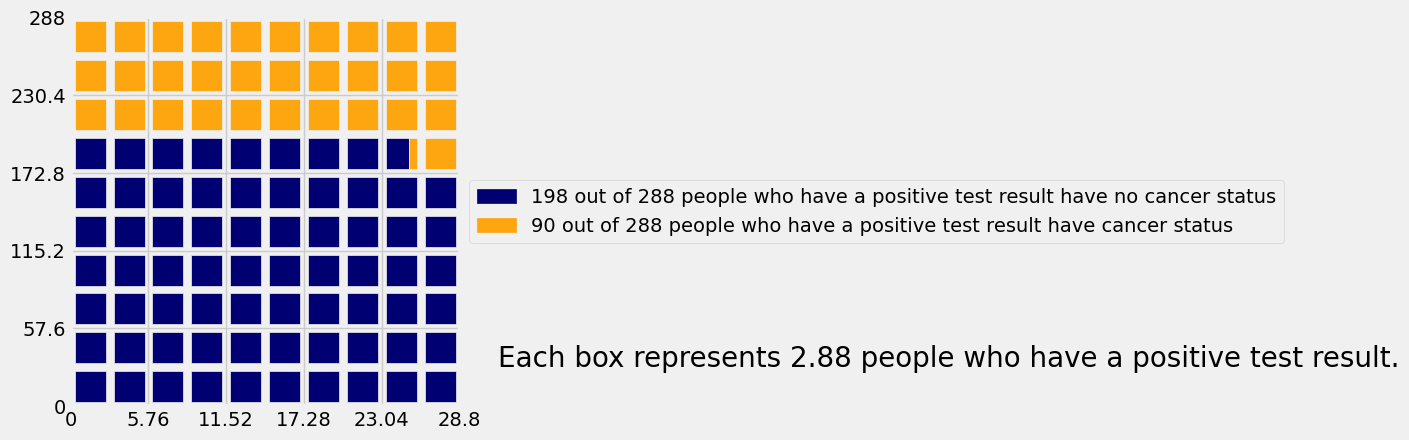

In [ ]:
# Just run this cell.
display_grouped_icon_array(people.where("test status", are.equal_to("positive")).drop(1), "people who have a positive test result")

The *conditional probability* that Person X **has cancer given their positive test result** is the chance that they're in the first group (cancer), assuming they have a positive test result.

---

**Question 3.2.1.** Eyeballing the icon array above, is the conditional probability that Person X has cancer **given their positive test result** closest to:

1. $\displaystyle\frac{9}{10}$

2. $\displaystyle\frac{2}{3}$

3. $\displaystyle\frac{1}{2}$

4. $\displaystyle\frac{1}{3}$

5. $\displaystyle\frac{1}{100}$


Assign `rough_prob_cancer_given_positive` to an integer corresponding to your answer.


In [ ]:
pos = 90/288
pos

0.3125

In [ ]:
# Set this to either 1, 2, 3, 4, or 5 corresponding to the correct probability.
rough_prob_cancer_given_positive = 4

In [ ]:
grader.check("q3_2_1")

q3_2_1 results: All test cases passed!

---

**Question 3.2.2.** Now write code to calculate that probability exactly, using the original contingency table you wrote (the `cancer` table).

Run the next code cell to see the `cancer` table, then fill in `prob_cancer_given_positive` with your code.


In [ ]:
# Run this cell first to see the cancer table. Then fill in the next cell.
cancer.show()

prob_cancer_given_positive = 90/(198+90)

print('Probability of cancer given positive test result: {}'.format(prob_cancer_given_positive))

status,negative,positive
cancer,10,90
no cancer,9702,198


Probability of cancer given positive test result: 0.3125


In [ ]:
grader.check("q3_2_2")

q3_2_2 results: All test cases passed!

---

**Question 3.2.3.** Look at the full icon array again.  Using that, how would you compute the conditional probability of cancer given a positive test?

Run the next code cell to see the full icon array. 


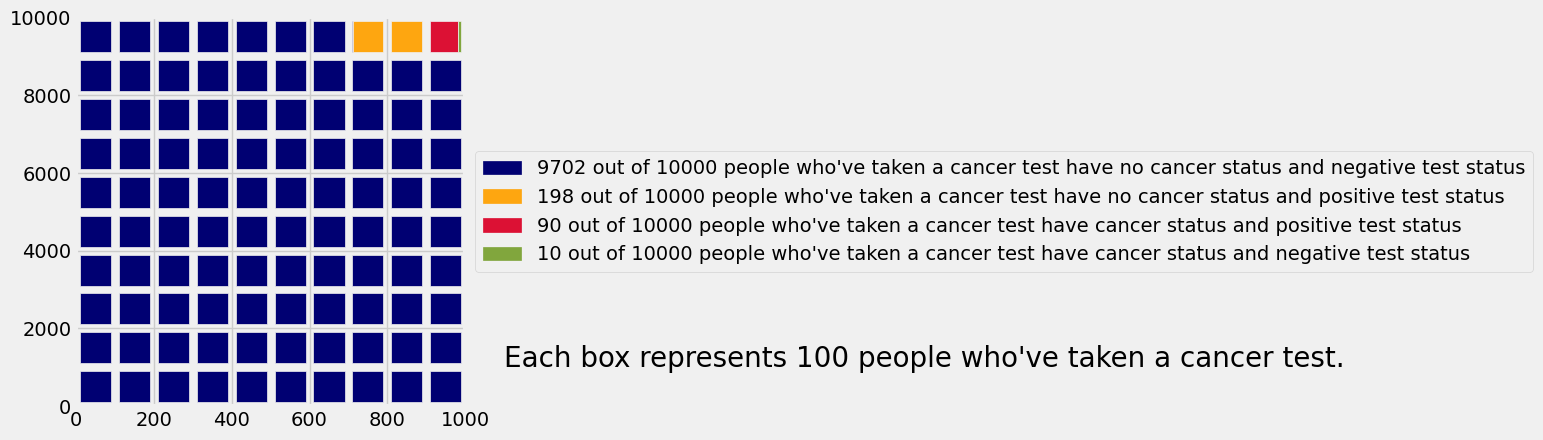

In [ ]:
# The full icon array is given here for your convenience.
# Write your answer in the previous cell.
display_grouped_icon_array(people, "people who've taken a cancer test")

---

**Question 3.2.4.** Is your answer to question 3.2.2 larger than the overall proportion of people in the population who have cancer (given as 1% in 3.1.1)?  Does that make sense? Check with your peers or a staff member to see if you have the right idea. 


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# 4. A Subjective Prior

Being right isn’t always satisfying. Classifying a Positive patient as not having cancer still seems somehow wrong, for such an accurate test. In this section, we'll take a deeper look at the basis of our probability calculation: the assumption of randomness.

Our assumption was that a randomly chosen person was tested from our population of 10,000 individuals. This doesn’t happen in reality. People go in to get tested because they think they might have the disease, or because their doctor thinks they might have the disease. People getting tested are not randomly chosen members of the population.

That is why our intuition about people getting tested was not fitting well with the answer that we got. In **Question 3.2.2**, we calculated that the probability of cancer given a positive test result was **0.3125**, or **31.25%**. This seems unusually low, especially given what we know about the efficacy of cancer screenings. We were imagining a realistic situation of a patient going in to get tested because there was some reason for them to do so, whereas the calculation was based on a randomly chosen person being tested.

So let’s redo our calculation under the more realistic assumption that the patient is getting tested because the doctor thinks there’s a chance the patient has the disease and compare the two probabilities.

**Aside:** For more information about Part 4 of this lab, check out [Section 18.2.2](https://inferentialthinking.com/chapters/18/2/Making_Decisions.html#a-subjective-prior) from the textbook.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 4.1. A New Look at the Population
Suppose now that our population of 10,000 inviduals takes into account the fact that choosing to take a medical test is not done at random; there must be some motive for an individual to take one. Thus, our modified population has the following properties:
1. 1,000 people have cancer.
1. Among the 1,000 people that have cancer, 900 have positive results on a cancer test and 100 have negative results. 
3. The other 9,000 people don't have cancer.
4. Among these 9,000 people, 180 have positive results on a cancer test and the other 8,820 have negative results.  (So 180 see "false positive" results.)

Below we've generated a population table called `people_new` and a contingency table with data from these 10,000 hypothetical people called `cancer_new`.

In [ ]:
# Just run this cell to load the table
people_new = Table().with_columns(
    "status", ["cancer", "cancer", "no cancer", "no cancer"],
    "test status", ["positive", "negative", "positive", "negative"],
    "count", [900, 100, 180, 8820])
people_new

status,test status,count
cancer,positive,900
cancer,negative,100
no cancer,positive,180
no cancer,negative,8820


In [ ]:
# Just run this cell to load the table
cancer_new = Table().with_columns(
    "status", ["cancer", "no cancer"],
    "negative", [100, 8820],
    "positive", [900, 180])
cancer_new

status,negative,positive
cancer,100,900
no cancer,8820,180


As before, we can present the data above in an icon array. Here is the `people_new` data in such a format.

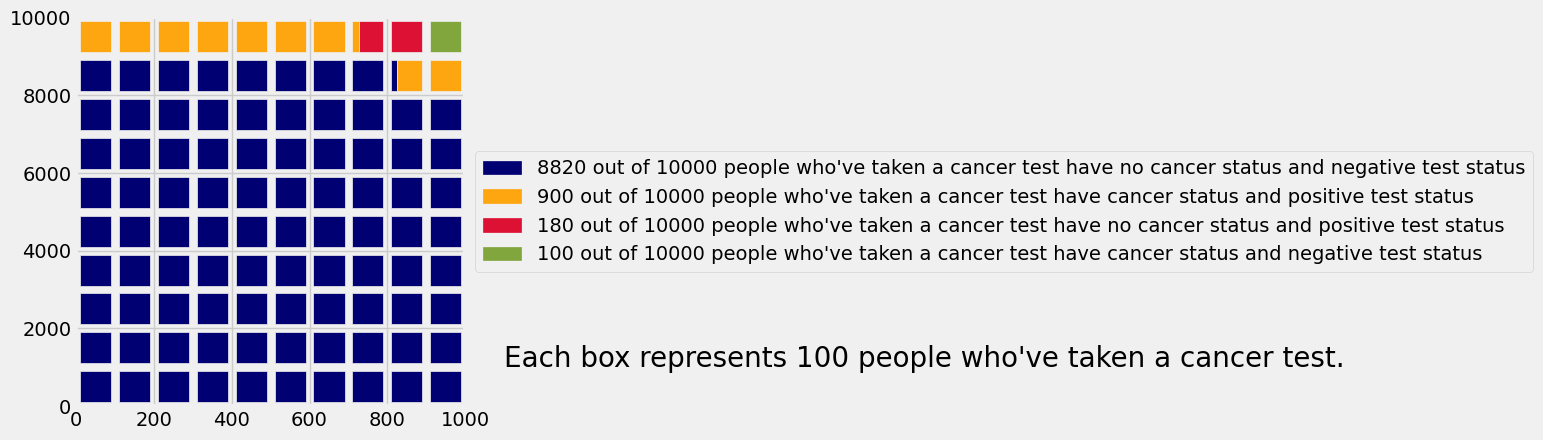

In [ ]:
display_grouped_icon_array(people_new, "people who've taken a cancer test")

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 4.2. Interpretation and Comparison
As in Part 3, let's suppose Person X has a positive test result.  This means that you can now narrow them down to being part of just one of the two following groups:
1. The people with cancer who have a positive test result.
2. The people without cancer who have a positive test result.

Just as we did in Part 3 of this lab, here's an icon array for those two groups:

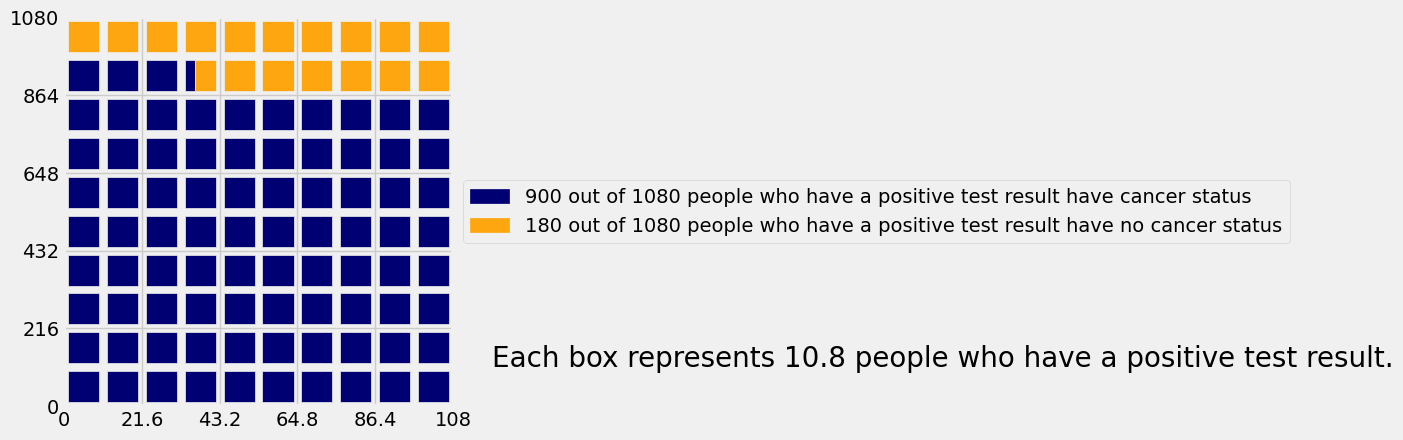

In [ ]:
# Just run this cell.
display_grouped_icon_array(people_new.where("test status", are.equal_to("positive")).drop(1), "people who have a positive test result")

---

**Question 4.2.1.** Using the new contingency table, `cancer_new`, that was provided at the beginning of this section, write code to calculate the exact probability that an individual has cancer given that they've received a positive test result.

Run the next code cell to see the `cancer_new` table, then fill in `prob_cancer_given_positive_new` with your code.


In [ ]:
# Run this cell first to see the cancer_new table. Then fill in the next line of this cell.
cancer_new.show()

prob_cancer_given_positive_new = 900/1080

print(f'Probability of cancer given positive test result: {prob_cancer_given_positive_new}')

status,negative,positive
cancer,100,900
no cancer,8820,180


Probability of cancer given positive test result: 0.8333333333333334


In [ ]:
grader.check("q4_2_1")

q4_2_1 results: All test cases passed!

---

**Question 4.2.2.** How does your probability in 3.2.2 compare to your answer from 4.2.1? Does that make sense? Check with your peers or a staff member to see if you have the right idea. 

*Hint:* Check out [Ch 18.2.2](https://inferentialthinking.com/chapters/18/2/Making_Decisions.html#a-subjective-prior) for additional help!


## Done!

<img src="./bruno.png" alt="Photo of an English Cream Golden Retriever" width="250"/>

Bruno congratulates you with finishing **_all_** of the Data 8 labs!!!


---

You're done with lab!

**Important submission information:**
- **Run all the tests** and verify that they all pass
- **Save** from the **File** menu
- **Run the final cell to generate the zip file**
- **Click the link to download the zip file**
- Then, go to [Gradescope](https://www.gradescope.com/courses/952061) and submit the zip file to the corresponding assignment. The name of this assignment is "Lab XX Autograder", where XX is the lab number -- 01, 02, 03, etc.

- If you finish early in Regular Lab, **ask one of the staff members to check you off**.

**It is your responsibility to make sure your work is saved before running the last cell.**


---

To double-check your work, the cell below will rerun all of the autograder tests.

In [77]:
grader.check_all()

q2_0_1 results: All test cases passed!

q2_0_2 results: All test cases passed!

q2_1_1 results: All test cases passed!

q2_1_2 results: All test cases passed!

q3_1_1 results: All test cases passed!

q3_1_2 results: All test cases passed!

q3_2_1 results: All test cases passed!

q3_2_2 results: All test cases passed!

q4_2_1 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [78]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)